In [1]:
from numpy import *
from pylab import *
import pandas as pd

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


In [2]:
WTPD_WTM = pd.read_csv("../hdx/WTPD_WTM.xlsx.csv", names = ["ResRange","dDI","pE","nE"],)
MM_WTPD = pd.read_csv("../hdx/MM_WTPD.csv", names = ["ResRange","dDI","pE","nE"],)




STAT5BSEQ="MAVWIQAQQLQGEALHQMQALYGQHFPIEVRHYLSQWIESQAWDSVDLDNPQENIKATQLLEGLVQELQKKAEHQVGEDGFLLKIKLGHYATQLQNTYDRCPMELVRCIRHILYNEQRLVREANNGSSPAGSLADAMSQKHLQINQTFEELRLVTQDTENELKKLQQTQEYFIIQYQESLRIQAQFGPLAQLSPQERLSRETALQQKQVSLEAWLQREAQTLQQYRVELAEKHQKTLQLLRKQQTIILDDELIQWKRRQQLAGNGGPPEGSLDVLQSWCEKLAEIIWQNRQQIRRAEHLCQQLPIPGPVEEMLAEVNATITDIISALVTSTFIIEKQPPQVLKTQTKFAATVRLLVGGKLNVHMNPPQVKATIISEQQAKSLLKNENTRNDYSGEILNNCCVMEYHQATGTLSAHFRNMSLKRIKRSDRRGAESVTEEKFTILFESQFSVGGNELVFQVKTLSLPVVVIVHGSQDNNATATVLWDNAFAEPGRVPFAVPDKVLWPQLCEALNMKFKAEVQSNRGLTKENLVFLAQKLFNNSSSHLEDYSGLSVSWSQFNRENLPGRNYTFWQWFDGVMEVLKKHLKPHWNDGAILGFVNKQQAHDLLINKPDGTFLLRFSDSEIGGITIAWKFDSQERMFWNLMPFTTRDFSIRSLADRLGDLNYLIYVFPDRPKDEVYSKYYTPVPCESATAKAVDGYVKPQIKQVVPEFVNASADAGGGSATYMDQAPSPAVCPQAHYNMYPQNPDSVLDTDGDFDLEDTMDVARRVEELLGRPMDSQWIPHAQS"
STAT5BSEQN642H="MAVWIQAQQLQGEALHQMQALYGQHFPIEVRHYLSQWIESQAWDSVDLDNPQENIKATQLLEGLVQELQKKAEHQVGEDGFLLKIKLGHYATQLQNTYDRCPMELVRCIRHILYNEQRLVREANNGSSPAGSLADAMSQKHLQINQTFEELRLVTQDTENELKKLQQTQEYFIIQYQESLRIQAQFGPLAQLSPQERLSRETALQQKQVSLEAWLQREAQTLQQYRVELAEKHQKTLQLLRKQQTIILDDELIQWKRRQQLAGNGGPPEGSLDVLQSWCEKLAEIIWQNRQQIRRAEHLCQQLPIPGPVEEMLAEVNATITDIISALVTSTFIIEKQPPQVLKTQTKFAATVRLLVGGKLNVHMNPPQVKATIISEQQAKSLLKNENTRNDYSGEILNNCCVMEYHQATGTLSAHFRNMSLKRIKRSDRRGAESVTEEKFTILFESQFSVGGNELVFQVKTLSLPVVVIVHGSQDNNATATVLWDNAFAEPGRVPFAVPDKVLWPQLCEALNMKFKAEVQSNRGLTKENLVFLAQKLFNNSSSHLEDYSGLSVSWSQFNRENLPGRNYTFWQWFDGVMEVLKKHLKPHWNDGAILGFVNKQQAHDLLINKPDGTFLLRFSDSEIGGITIAWKFDSQERMFWHLMPFTTRDFSIRSLADRLGDLNYLIYVFPDRPKDEVYSKYYTPVPCESATAKAVDGYVKPQIKQVVPEFVNASADAGGGSATYMDQAPSPAVCPQAHYNMYPQNPDSVLDTDGDFDLEDTMDVARRVEELLGRPMDSQWIPHAQS"
def GetResRange(seqs,DF):
    STAT5BSEQ = seqs[0]
    STAT5BSEQN642H=seqs[1]
    MM_MPD = DF
    
    ResRange=[]
    for i in range(len(MM_MPD["Resnames"])):
        if MM_MPD["Resnames"].iloc[i] in STAT5BSEQ or MM_MPD["Resnames"].iloc[i] in STAT5BSEQN642H:
            try:ResRange.append(str(STAT5BSEQ.index(MM_MPD["Resnames"].iloc[i])+1)+"-"+ str(len(MM_MPD["Resnames"].iloc[i])+STAT5BSEQ.index(MM_MPD["Resnames"].iloc[i])))
            except:ResRange.append(str(STAT5BSEQN642H.index(MM_MPD["Resnames"].iloc[i])+1)+"-"+ str(len(MM_MPD["Resnames"].iloc[i])+STAT5BSEQN642H.index(MM_MPD["Resnames"].iloc[i])))
        else: ResRange.append("dne")
            
    return ResRange
MM_MPD = pd.read_csv("../hdx/MM_MPD.csv", names = ["ResRange","Resnames","dDI","pE","nE"],)
MM_MPD["ResRange"] = GetResRange([STAT5BSEQ,STAT5BSEQN642H],MM_MPD)
MM_MPD = MM_MPD[MM_MPD.ResRange !="dne"].reset_index(drop = True)

WTM_MM = pd.read_csv("../hdx/WTM_MM.xlsx.csv", names = ["Resnames","dDI","pE","nE"],)
WTM_MM["ResRange"] = GetResRange([STAT5BSEQ,STAT5BSEQN642H],WTM_MM)
WTM_MM = WTM_MM[WTM_MM.ResRange !="dne"].reset_index(drop = True)

threeColor=["#0A732D","#332288","#882255"]

In [3]:
MM_MPD

,ResRange,Resnames,dDI,pE,nE
0,152-170,RLVTQDTENELKKLQQTQE,-2.339591,2.902353,-2.902353
1,205-213,QQKQVSLEA,4.716989,4.791132,-4.791132
2,212-224,EAWLQREAQTLQQ,-0.185125,3.310382,-3.310382
3,214-224,WLQREAQTLQQ,-0.929471,3.325598,-3.325598
4,225-239,YRVELAEKHQKTLQL,0.848898,2.484041,-2.484041
5,230-239,AEKHQKTLQL,0.931817,3.448364,-3.448364
6,240-248,LRKQQTIIL,-2.423055,3.408783,-3.408783
7,253-272,IQWKRRQQLAGNGGPPEGSL,-0.264720,2.715614,-2.715614
8,285-299,IIWQNRQQIRRAEHL,1.598994,3.984394,-3.984394
9,332-351,FIIEKQPPQVLKTQTKFAAT,-2.056977,3.325077,-3.325077


Text(0, 0.5, 'Deuterium Incorporation (%)')

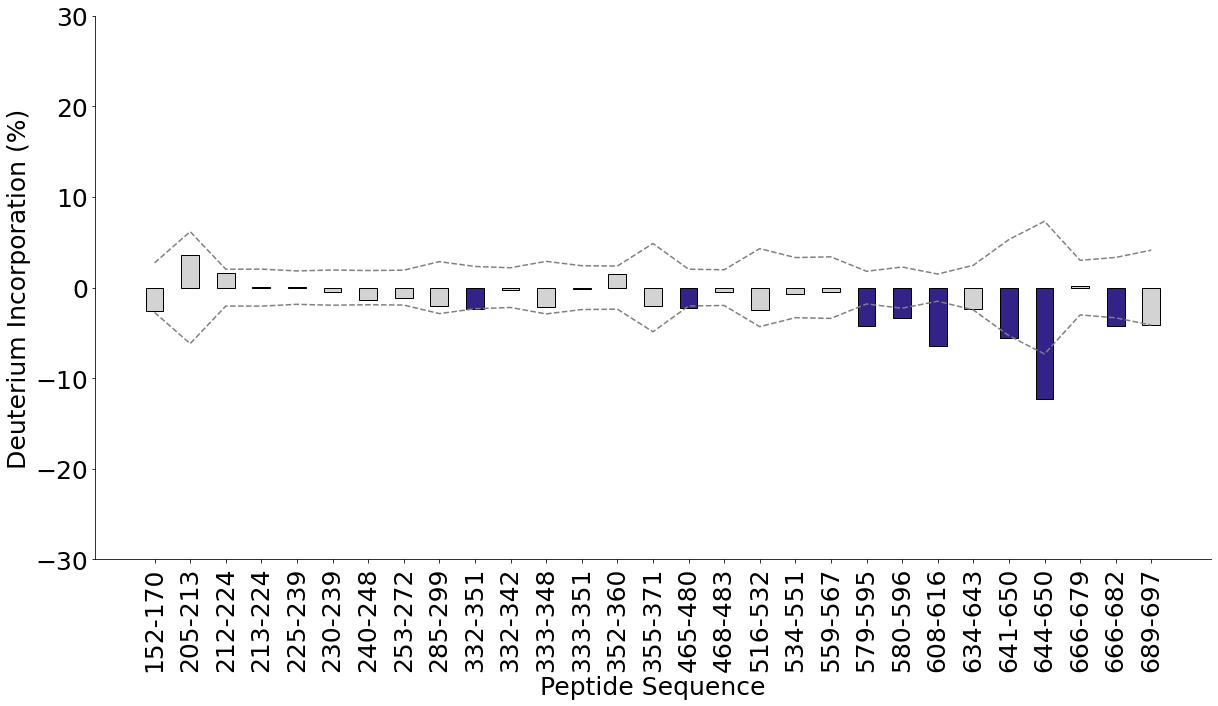

In [6]:
#style.use("seaborn-poster")
ResRange = WTPD_WTM.ResRange
avgDiffBars=WTPD_WTM.dDI
nE = WTPD_WTM.nE
pE = WTPD_WTM.pE
colors =[]

#for i in range(len(avgDiffBars)):
#    
#    if avgDiffBars[i] < nE[i] or avgDiffBars[i] > pE[i]:
#    
#        if avgDiffBars[i] > 0:
#            colors.append([1.,1-abs((avgDiffBars[i]/30)),1-abs(avgDiffBars[i]/30)])
#        if avgDiffBars[i] <=0:
#            colors.append([1-abs(avgDiffBars[i]/30),1-abs(avgDiffBars[i]/30),1.])
#    else:
#        colors.append("lightgrey")
#        
for i in range(len(avgDiffBars)):
    
    if avgDiffBars[i] < nE[i] or avgDiffBars[i] > pE[i]:
    
        if avgDiffBars[i] > 0:
            colors.append(threeColor[0])
        if avgDiffBars[i] <=0:
            colors.append(threeColor[1])
    else:
        colors.append("lightgrey")

figure(figsize = (20,10))
bar(ResRange,avgDiffBars,edgecolor = "black",color = colors,width = .5)
plot(ResRange,pE,"--",color = "grey")
plot(ResRange,nE,"--",color = "grey")
asfdasdvfsvsdf=xticks(rotation = 90,fontsize = 25)
sdakljhfakhjndrkasjhdfr = yticks(fontsize = 25)
ylim(-30,30)
#cmap = mpl.cm.bwr
#norm = mpl.colors.Normalize(vmin=-max(avgDiffBars), vmax=max(avgDiffBars))
#cb1 = mpl.colorbar.ColorbarBase(cmap=cmap,
#                                norm=norm,
#                                orientation='horizontal')
xlabel("Peptide Sequence",fontsize = 25)
ylabel("Deuterium Incorporation (%)",fontsize = 25)
#title("WTPD vs WT-Apo")
#axvline(10)

Text(0, 0.5, 'Deuterium Incorporation (%)')

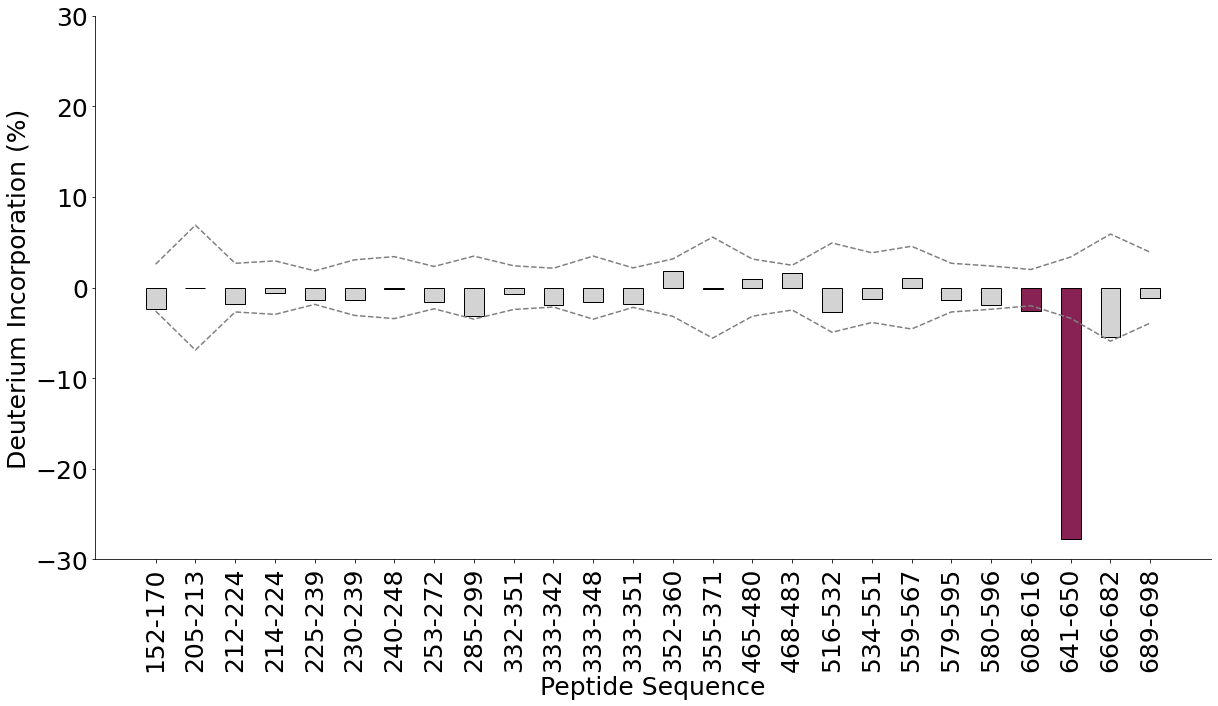

In [7]:
ResRange = WTM_MM.ResRange
avgDiffBars=WTM_MM.dDI
nE = WTM_MM.nE
pE = WTM_MM.pE
colors =[]

#for i in range(len(avgDiffBars)):
#    
#    if avgDiffBars[i] < nE[i] or avgDiffBars[i] > pE[i]:
#    
#        if avgDiffBars[i] > 0:
#            colors.append([1.,1-abs((avgDiffBars[i]/30)),1-abs(avgDiffBars[i]/30)])
#        if avgDiffBars[i] <=0:
#            colors.append([1-abs(avgDiffBars[i]/30),1-abs(avgDiffBars[i]/30),1.])
#    else:
#        colors.append("lightgrey")

        
        
for i in range(len(avgDiffBars)):
    
    if avgDiffBars[i] < nE[i] or avgDiffBars[i] > pE[i]:
    
        if avgDiffBars[i] > 0:
            colors.append(threeColor[1])
        if avgDiffBars[i] <=0:
            colors.append(threeColor[2])
    else:
        colors.append("lightgrey")
        
        
figure(figsize = (20,10))
bar(ResRange,avgDiffBars,edgecolor = "black",color = colors,width = .5)
plot(ResRange,pE,"--",color = "grey")
plot(ResRange,nE,"--",color = "grey")
asfdasdvfsvsdf=xticks(rotation = 90,fontsize = 25)
sdakljhfakhjndrkasjhdfr = yticks(fontsize = 25)
ylim(-30,30)
#cmap = mpl.cm.bwr
#norm = mpl.colors.Normalize(vmin=-max(avgDiffBars), vmax=max(avgDiffBars))
#cb1 = mpl.colorbar.ColorbarBase(cmap=cmap,
#                                norm=norm,
#                                orientation='horizontal')
xlabel("Peptide Sequence",fontsize = 25)
#title("WT-Apo v Mutant-apo")
ylabel("Deuterium Incorporation (%)",fontsize = 25)
